In [2]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

In [7]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


Признаки: 

1. GRE Scores ( out of 340 ) — баллы по GRE тестированию
2. TOEFL Scores ( out of 120 ) — баллы по экзамену TOEFL
3. University Rating ( out of 5 ) — рейтинг университета 
4. Statement of Purpose Strength ( out of 5 ) — весомость мотивационного письма
5. Letter of Recommendation Strength ( out of 5 ) — весомость рекомендационных писем
6. Undergraduate GPA ( out of 10 ) — средний балл в бакалавриате
7. Research Experience ( either 0 or 1 ) — наличие опыта исследовательской работы ( нет / есть)

In [9]:
data = data.drop('Serial No.',1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
C = data.corr(method='pearson')
C

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

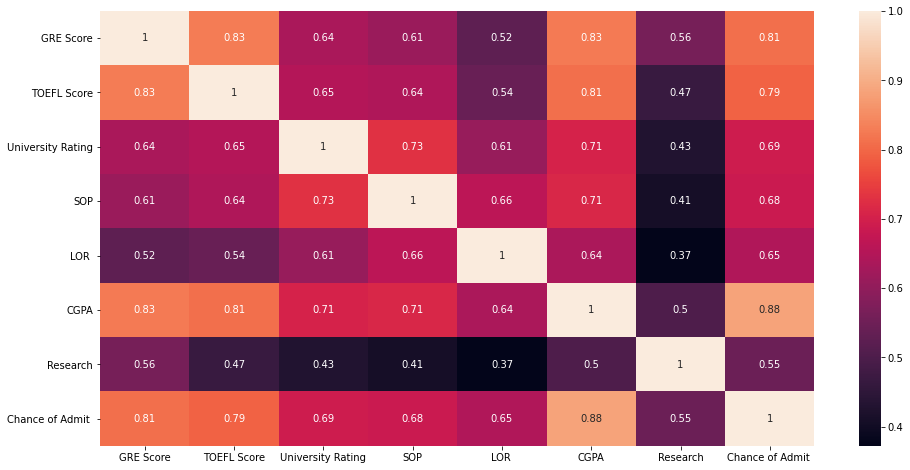

In [16]:
plt.figure(figsize=(16,8))
sns.heatmap(data=C, annot=True)

<AxesSubplot:>

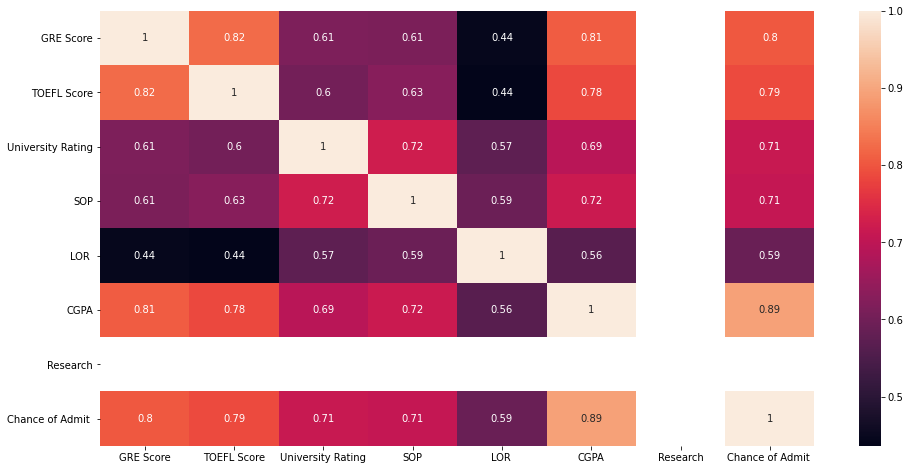

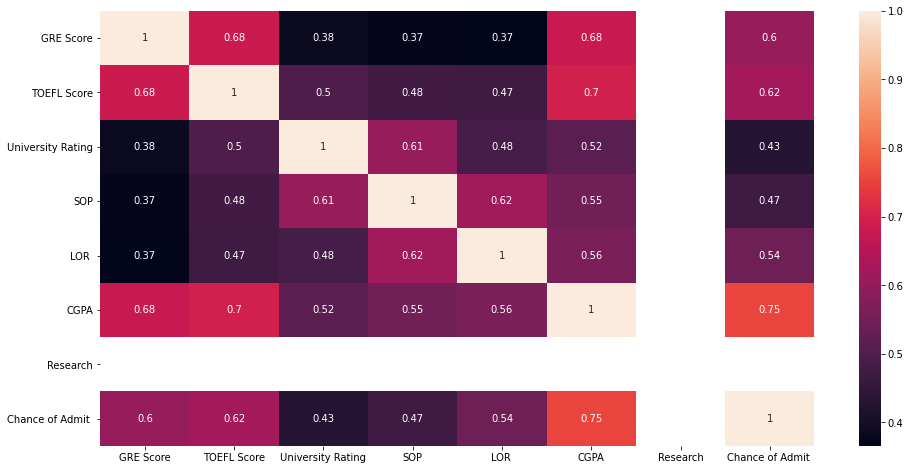

In [24]:
C_research = data[data.Research==1].corr(method='pearson')
C_no_research = data[data.Research==0].corr(method='pearson')
plt.figure(figsize=(16,8))
sns.heatmap(data=C_research, annot=True)
plt.figure(figsize=(16,8))
sns.heatmap(data=C_no_research, annot=True)

In [37]:
TOEFL = data[data.Research==0][['TOEFL Score']]
CGPA = data[data.Research==0][['CGPA']]
print("TOEFL shape",TOEFL.shape)
print("CGPA shape",CGPA.shape)
A = np.column_stack((np.ones(220),TOEFL,CGPA))
A

TOEFL shape (220, 1)
CGPA shape (220, 1)


array([[  1.  , 103.  ,   8.21],
       [  1.  , 101.  ,   7.9 ],
       [  1.  , 102.  ,   8.  ],
       [  1.  , 108.  ,   8.6 ],
       [  1.  , 105.  ,   8.3 ],
       [  1.  , 107.  ,   8.7 ],
       [  1.  , 110.  ,   8.8 ],
       [  1.  , 102.  ,   8.5 ],
       [  1.  , 114.  ,   8.4 ],
       [  1.  , 109.  ,   8.8 ],
       [  1.  ,  93.  ,   7.2 ],
       [  1.  ,  99.  ,   7.3 ],
       [  1.  , 106.  ,   8.4 ],
       [  1.  , 105.  ,   7.8 ],
       [  1.  , 105.  ,   7.5 ],
       [  1.  , 108.  ,   7.7 ],
       [  1.  , 117.  ,   9.1 ],
       [  1.  , 119.  ,   9.7 ],
       [  1.  , 110.  ,   8.  ],
       [  1.  , 103.  ,   7.7 ],
       [  1.  , 102.  ,   7.4 ],
       [  1.  ,  99.  ,   7.6 ],
       [  1.  , 104.  ,   8.3 ],
       [  1.  , 100.  ,   8.1 ],
       [  1.  , 101.  ,   8.2 ],
       [  1.  , 111.  ,   8.7 ],
       [  1.  , 112.  ,   8.92],
       [  1.  , 114.  ,   9.02],
       [  1.  , 106.  ,   8.9 ],
       [  1.  ,  99.  ,   8.22],
       [  

In [38]:
y = data[data.Research==0][['Chance of Admit ']]
y

,Chance of Admit
4,0.65
7,0.68
8,0.50
9,0.45
15,0.54
...,...
487,0.79
489,0.65
491,0.54
498,0.73


In [51]:
w_hat_1 = -1.045
w_hat_2 = 0.004
w_hat_3 = 0.148

TOEFL_new = 107
CGPA_new = 9.1

y_new = w_hat_1 + w_hat_2*TOEFL_new + w_hat_3*CGPA_new

y_new

0.7297999999999998

In [50]:
x_new = np.array([1,TOEFL_new,CGPA_new])
w_hat = np.linalg.lstsq(A, y, rcond=None)[0]
x_new@w_hat

array([0.77635853])

In [55]:
T_c = TOEFL - TOEFL.mean()
C_c = CGPA - CGPA.mean()
y_c = y - y.mean()

In [56]:
T_st = T_c/np.linalg.norm(T_c)
C_st = C_c/np.linalg.norm(C_c)
y_st = y_c/np.linalg.norm(y_c)

In [57]:
A_st = np.column_stack((T_st,C_st))

In [59]:
np.linalg.lstsq(A_st, y_st, rcond=None)[0]

array([[0.19044768],
       [0.62001517]])